In [2]:
from pathlib import Path
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [3]:
episode_breaks        = [0, 20, 44, 62, 86, 105, 121, 148, 161, 188, 207]
episode_cell_activity = [2.4014, 2.4977, 2.4484, 2.3806, 2.3349, 2.2423, 2.2253, 2.1686, 2.1767, 2.0925, 2.0978]


In [4]:
log_path = Path("checkpoints/2025-11-27_43599_cl1-2507-15/training_log.jsonl")
with open(log_path, mode="r", encoding="utf-8") as f:
    lines = f.readlines()
    logs = \
        [
            json.loads(line) for line in lines
        ]

logs = pd.DataFrame(logs)
logs


,total_episodes,episode_reward,episode_length,success_actions,fail_actions,neutral_actions,success_rate,total_steps
0,1,-729.773148,117,63,50,0,0.557522,116
1,2,-321.670929,375,206,167,0,0.552279,491
2,3,-290.231842,183,102,80,0,0.560440,674
3,4,-156.152588,375,190,178,0,0.516304,1049
4,5,-293.735565,375,194,175,0,0.525745,1424
...,...,...,...,...,...,...,...,...
202,203,-234.381897,201,111,88,0,0.557789,49436
203,204,-54.145248,253,144,108,0,0.571429,49689
204,205,-898.502457,44,26,17,0,0.604651,49733
205,206,-520.577209,74,49,23,0,0.680556,49807


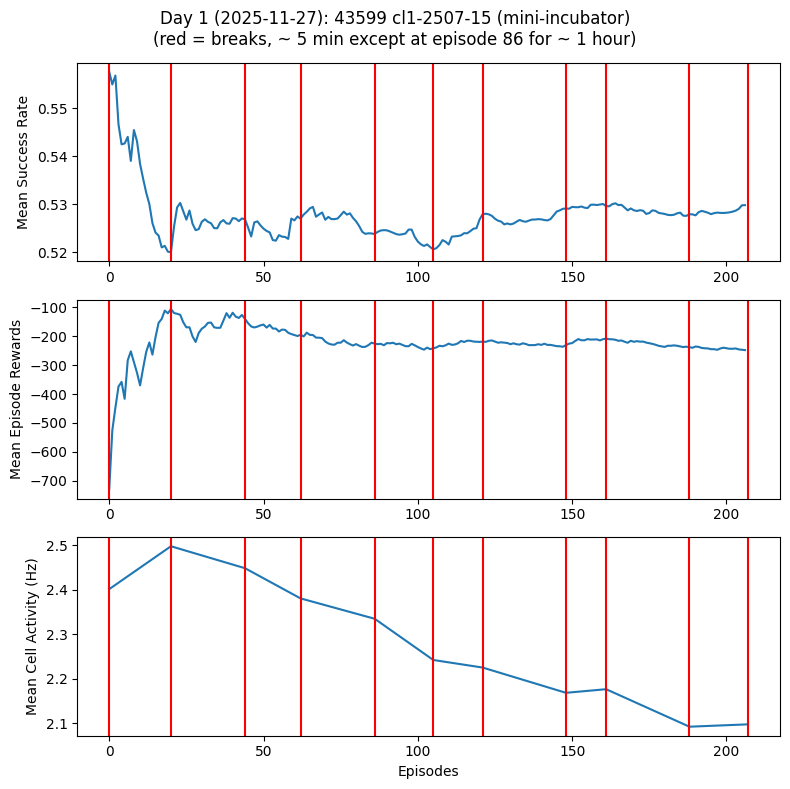

In [8]:
n_axes = 3
fig    = plt.figure(figsize=(8, 8))
gs     = GridSpec(nrows=n_axes, ncols=1)
axes   = []
for i in range(n_axes):
    axes.append(fig.add_subplot(gs[i, 0], sharex=axes[0] if i > 0 else None))

success_rate = logs["success_rate"]
cumulative_success_rates = np.cumsum(success_rate) / np.arange(1, len(success_rate) + 1)
axes[0].plot(cumulative_success_rates)
axes[0].set_ylabel("Mean Success Rate")

episode_reward = logs["episode_reward"]
cumulative_episode_reward = np.cumsum(episode_reward) / np.arange(1, len(episode_reward) + 1)
axes[1].plot(cumulative_episode_reward)
axes[1].set_ylabel("Mean Episode Rewards")

axes[2].plot(episode_breaks, episode_cell_activity)
axes[2].set_ylabel("Mean Cell Activity (Hz)")

for ax in axes:
    for episode in episode_breaks:
        ax.axvline(episode, c="red")

fig.suptitle(
    "Day 1 (2025-11-27): 43599 cl1-2507-15 (mini-incubator)\n"
    "(red = breaks, ~ 5 min except at episode 86 for ~ 1 hour)"
    )

axes[-1].set_xlabel("Episodes")

fig.tight_layout()
plt.show()
